# Série 4 - Résolution d'un système d'équations différentielles

Le but de cette série est d'illustrer **comment résoudre un système d'équations différentielles** avec la fonction `solve_ivp` du module `scipy`.

Nous allons prendre un des exemples classiques en écologie des populations, le modèle de Lotka-Volterra et son application sur les interactions entre Lynx et Lièvres au Canada.

## Visualisation des données

Le fichier `hudson.txt` contient des données issues des registres de la compagnie de la baie d'Hudson. La première colonne contient l'année. Les deux autres colonnes contiennent le nombre de milliers de fourrures de Lynx et de Lièvres par année vendus par les trappeurs. 

**Exercice 1 - Visualisation**

Chargez le fichier de données et faites le graphe montrant les variations des deux populations sur l'intervalle de temps considéré. Commentez vos observations.

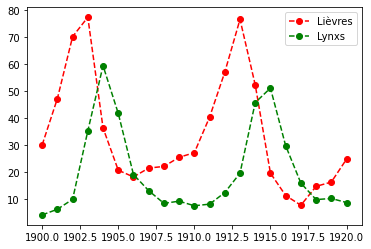

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tmp = np.loadtxt('data/hudson.txt')
annees, lievres, lynxs = tmp[:,0], tmp[:,1], tmp[:,2]

plt.plot(annees, lievres, 'o--r', label = 'Lièvres')
plt.plot(annees, lynxs, 'o--g', label = 'Lynxs')
plt.legend()
plt.show()

**Observations** : On observe que le nombre de lièvre est en général supérieur au nombre de lynx. Lorsque le nombre de Lynx augmente, le nombre de Lièvres diminue et quelques années plus tard le nombre de Lynx baisse également. Le système constitué des Lynx et des Lièvres oscille avec une période de l'ordre de 10 ans.

## Modèle de Lotka Volterra

Pour reproduire ce type de donnée, Lotka et Volterra ont introduit un modèle qui a été énormément étudié pour les intéraction entre proies et prédateurs, ou plus généralement des interactions conflictuelles entre deux entitées dans un système. 

Le modèle suppose que le nombre de proies, notées $v_1(t)$, ici les lièvres, pourraient se reproduire en suivant une croissance exponentielle si les prédateurs n'étaient pas là. Donc le premier membre de l'équation représentant leur taux de variation est que l'accroissement de la population doit être proportionnel à la population: $p_1 v1(t)$.

Le nombre de prédateurs est notés $v_2(t)$. A chaque instant, l'hypothèse est que le nombre de proies qui sont capturées par les prédateurs est proportionnel au nombre de proies et de prédateurs : $p_2 ~ v_1(t) ~ v_2(t)$.

En combinant ces deux termes: croissance de la population et prélèvement par les prédateurs, on obtient le taux global de variation de la population de proies:

$$ \frac{d v_1}{d t} = p_1 ~ v_1(t) - p_2 ~ v_1(t) ~ v_2(t)$$

Pour les prédateurs, il est supposé que leur survie dépend entièrement des proies. Naturellement, si le nombre de proie accessible était nul, la population diminuerait régulièrement avec un taux de mortalité fixe. La baisse de la population chaque année est donc proportionnelle à la population de prédateur : $- p_3 ~ v_2(t)$.

Pour grandir, la population doit consommer des proies. Et le taux d'accroissement est donc proportionnel aux nombres de proies capturées. On a déja fait l'hypothèse que ce nombre est proportionnel au produit du nombre de proies et de prédateurs, on obtient le taux d'accroissement de la population de prédateurs $p_4 ~ v_1(t) ~ v_2(t)$. Le bilan de ces deux termes donne la deuxième équation de Lotka-Volterra:

$$ \frac{d v_2}{d t} = - p_3 ~ v_2(t) + p_4 ~ v_1(t) ~ v_2(t)$$

En résumé, le système naturel est donc décrit par un système de deux équations différentielles :


$$ \frac{d v_1}{d t} = p_1 ~ v_1(t) - p_2 ~ v_1(t) ~ v_2(t)$$
$$ \frac{d v_2}{d t} = - p_3 ~ v_2(t) + p_4 ~ v_1(t) ~ v_2(t)$$

Pour résoudre ces équations, il est nécessaire de connaitre les 4 paramètres qui interviennent, ainsi que les valeurs initiales.

**Exercice 2 - Construction et résolution du système**

On vous donne dans le bloc ci-dessous le vecteur de paramètres $p$ qui contient dans l'ordre les valeurs de $p_1$, $p_2$, $p_3$, et $p_4$.

Vous devez définir un fonction `dvdt()` (vous pourriez choisir un autre nom) qui calcule les dérivées et renvoie un tableau numpy contenant $\frac{d v_1}{d t}$ et $\frac{d v_2}{d t}$, pour toutes les valeurs de $v$, du temps $t$ et des paramètres.


Résolvez ensuite le système d'équation en employant la fonction `solve_ivp` du module `scipy.integrate`.

On prendra comme valeur initiale pour le début de la simulation : 34 lièvres et 4 lynx.

Imprimez le résultat de la simulation et vérifiez que tout a bien fonctionné, puis faire un graphe pour comparer le résultat du modèle aux observations.

In [2]:
from scipy.integrate import solve_ivp

def dvdt(t, v):
    """ Fonction qui défini le problème de Lokta-Volterra.
    
    Cette fonction prend en entrée le temps t et la valeur courante 
    du vecteur v contenant les variables d'états.
    
    Elle renvoit le vecteur des dérivées des composantes de v 
    par rapport au temps.
    """
    
    # Définition des paramètres du modèles
    p = [0.48, 0.025, 0.93, 0.027]
    
    dv = np.zeros(2)
    dv[0] = p[0] * v[0] - p[1] * v[0] * v[1] 
    dv[1] = -p[2] * v[1]  + p[3] * v[0] * v[1] 
    return dv

# On définit l'intervalle de temps et les valeurs initiales
time_span = [1900, 1920]
v0 = [34, 4]

# Résolution du problème
sol = solve_ivp(dvdt, time_span , v0)

# Le résultat est stocké dans un objet qui contient de multiples informations
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 134
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1900.        , 1900.13004857, 1901.43053422, 1903.40098155,
       1903.94104386, 1904.48110617, 1905.39833772, 1906.60864963,
       1907.79668378, 1909.77665213, 1911.6234552 , 1913.65981315,
       1914.18953557, 1914.719258  , 1915.62251111, 1916.74909391,
       1917.87567671, 1919.69916072, 1920.        ])
 t_events: None
        y: array([[34.        , 35.72233694, 57.36286582, 64.32054073, 44.89894329,
        28.29681259, 15.33401276, 11.99961629, 14.28045808, 27.36355838,
        54.49130875, 67.22320037, 48.75882502, 31.10095538, 16.25480259,
        11.99030578, 13.36701748, 23.30210169, 26.03279746],
       [ 4.        ,  4.00575828,  5.99475269, 38.40511555, 51.7264901 ,
        52.92133707, 37.48090569, 18.62666936,  9.30195865,  4.20080889,
         5.4177033 , 35.61129133, 50.19840035, 

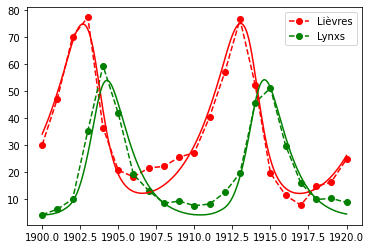

In [3]:
t = np.linspace(1900, 1920, 200)
# Résolution du problème
sol = solve_ivp(dvdt, time_span , v0, t_eval=t)

plt.plot(annees, lievres, 'o--r', label = 'Lièvres')
plt.plot(annees, lynxs, 'o--g', label = 'Lynxs')
plt.plot(t, sol.y[0,:], '-r')
plt.plot(t, sol.y[1,:], '-g')
plt.legend()
plt.show()

**Exercice 3 - Etude de sensibilité** 

La solution du système dépend des 4 paramètres que l'on vous a donné ci-dessus. On aimerait maintenant faire une étude pour savoir comment les deux populations changent en fonction du taux de reproduction des lièvres.

On aimerait faire un graphe avec les prédictions faites par le modèle pour des valeurs de $p_1$ variant de 0.35 à 0.55, et sur une durée de 40 ans.

Pour faire cela, le plus facile est de commencer par encapsuler  les calculs que vous avez réalisés ci-dessus dans une fonction `modele_lotka_volterra(t, v0, p)`. 

Ensuite, vous pouvez écrire une boucle permettant de répéter les calculs et faire le graphe désirée.

Commentez le résultat. Qu'observez-vous ?

In [4]:
def modele_lotka_volterra(t, v0, p):
    """Calcule l'évolution d'une population selon Lokta-Volterra.
    
    Cette fonction prend en entrée le tableau des temps t pour 
    lesquels on souhaite faire le calcul, le vecteur des valeurs 
    initiales, et le vecteur de paramètres p.
    
    La fonction retourne le tableau de l'évolution des deux populations."""
    
    def dvdt(t, v, p):
        "Ici on défini les deux dérivées"
        dv = np.zeros(2)
        dv[0] = p[0] * v[0] - p[1] * v[0] * v[1] 
        dv[1] = -p[2] * v[1]  + p[3] * v[0] * v[1] 
        return dv
    
    #Puis on résout le système d'équations différentielles
    sol = solve_ivp(dvdt, [t[0], t[-1]], v0, t_eval=t, args=[p])
    
    # On retourne uniquement le tableau de population
    return sol.y

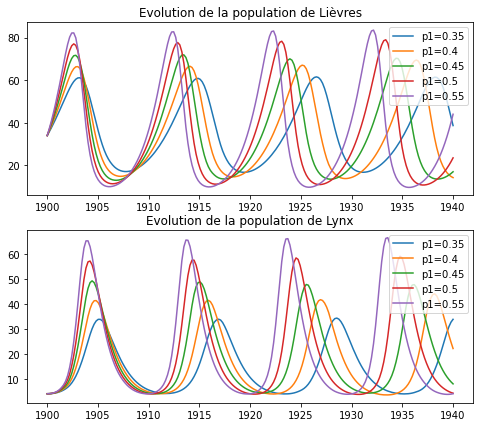

In [5]:
# Les valeurs de paramètres à tester
p = [0.0, 0.025, 0.93, 0.027]
f = [0.35, 0.4, 0.45, 0.5, 0.55]

# La durée du graphe
t = np.linspace(1900, 1940, 200)

plt.figure(figsize=(8,7))
ax1 = plt.subplot(2, 1, 1, title='Evolution de la population de Lièvres')
ax2 = plt.subplot(2, 1, 2, title='Evolution de la population de Lynx')

for i in range(5):
    p[0] = f[i]
    v = modele_lotka_volterra(t, v0, p)
    lab = 'p1=' + str(p[0])
    ax1.plot(t, v[0,:], '-', label=lab)
    ax2.plot(t, v[1,:], '-', label=lab)

ax1.legend(loc=1)
ax2.legend(loc=1)

plt.show()

**Observations** :  Ces calculs montrent comment la périodicité de l'évolution des populations changent en fonction de $p_1$ ainsi que la gamme de variation des 2 populations. Avec une fécondité faible, les variations de population sont plus modérées et la durée des cycles est plus longue.